In [1]:
%matplotlib inline
morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'

In [2]:
def sigmoid(x, x0=0, k=1, ymin=0, ymax=1):
    """
    """
    height_diff = ymax-ymin
    return ymin + height_diff/(1 + np.exp(-k*(x-x0)))

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


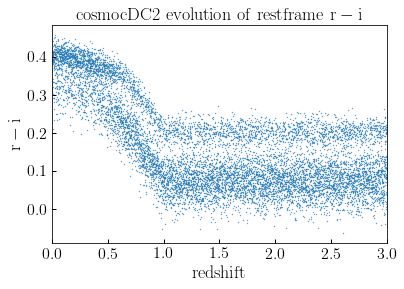

In [3]:
from cosmodc2.sdss_colors.sigmoid_r_minus_i import (
    red_sequence_peak_ri, main_sequence_peak_ri, r_minus_i)


ngals = int(1e4)
magr = np.random.uniform(-24, -12, ngals)
sfr_percentile = np.random.rand(ngals)
redshift = np.random.uniform(0, 3, ngals)
# result = gr_ri_monte_carlo(magr, sfr_percentile, redshift)

# red_sequence_peak_ri(magr, red_peak_ri, redshift, red_peak_ri_zevol_shift_table)

# ri, is_quiescent = r_minus_i(magr, redshift)
zarr = np.linspace(0, 3, len(magr))
ri, is_quiescent = r_minus_i(np.zeros_like(magr) + -21, zarr)

fig, ax = plt.subplots(1, 1)
__=ax.scatter(zarr, ri, s=0.1)

xlim = ax.set_xlim(0, 3)

xlabel = ax.set_xlabel(r'${\rm redshift}$')
ylabel = ax.set_ylabel(r'${\rm r-i}$')
title = ax.set_title(r'${\rm cosmocDC2\ evolution\ of\ restframe\ r-i}$')
figname = 'ri_evolution.png'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

In [47]:
def alt_red_sequence_ri_zevol_sigmoid_params(r):
    """
    """
    ymin = sigmoid(r, x0=-21, ymin=0.46, ymax=0.2, k=0.8)
    ymax = sigmoid(r, x0=-21., ymin=0.18, ymax=-0.04, k=1)
    return ymin, ymax


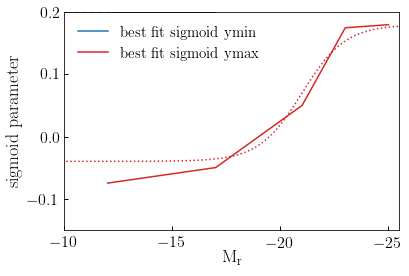

In [68]:
def red_sequence_ri_zevol_sigmoid_params(r):
    """
    """
    magr_seq = [-12, -17, -19, -21, -23, -25]
    ymin_seq = [0.2, 0.2, 0.25, 0.32, 0.43, 0.45]
    ymax_seq = [-0.075, -0.05, 0.0, 0.05, 0.175, 0.18]

    c4, c3, c2, c1, c0 = np.polyfit(magr_seq, ymin_seq, deg=4)
    ymin = c0 + c1*r + c2*r**2 + c3*r**3 + c4*r**4
    c4, c3, c2, c1, c0 = np.polyfit(magr_seq, ymax_seq, deg=4)
    ymax = c0 + c1*r + c2*r**2 + c3*r**3 + c4*r**4
    return ymin, ymax

magr_seq = [-12, -17, -19, -21, -23, -25]
ymin_seq = [0.2, 0.2, 0.25, 0.32, 0.43, 0.45]
ymax_seq = [-0.075, -0.05, 0.0, 0.05, 0.175, 0.18]


fig, ax = plt.subplots(1, 1)

__=ax.plot(magr_seq, ymin_seq, 
           color=mblue, label=r'${\rm best\ fit\ sigmoid\ ymin}$')
__=ax.plot(magr_seq, ymax_seq, color=mred, label=r'${\rm best\ fit\ sigmoid\ ymax}$')

r = np.linspace(-26, -10, 1000)

# c4, c3, c2, c1, c0 = np.polyfit(magr_seq, ymin_seq, deg=4) 
# __=ax.plot(r, c0 + c1*r + c2*r**2 + c3*r**3 + c4*r**4, '--', 
#            color=mblue, label=r'${\rm smooth\ model\ approximation}$')

# c4, c3, c2, c1, c0 = np.polyfit(magr_seq, ymax_seq, deg=4) 
# __=ax.plot(r, c0 + c1*r + c2*r**2 + c3*r**3 + c4*r**4, '--', 
#            color=mred, label=r'${\rm smooth\ model\ approximation}$')

y = sigmoid(r, x0=-21, ymin=0.45, ymax=0.2, k=0.8)
# __=ax.plot(r, y, '--', color=mblue)
y2 = sigmoid(r, x0=-21, ymin=0.46, ymax=0.2, k=0.8)
__=ax.plot(r, y2, '--', color=mblue)

z = sigmoid(r, x0=-21., ymin=0.18, ymax=-0.04, k=1)
__=ax.plot(r, z, ':', color=mred)

leg = ax.legend()
xlim = ax.set_xlim(xmin=-10, xmax=-26.5)
ylim = ax.set_ylim(-0.15, 0.6)
ylim = ax.set_ylim(-0.15, 0.2)
xlim = ax.set_xlim(xmin=-10, xmax=-25.5)

xlabel = ax.set_xlabel(r'${\rm M_{r}}$')
ylabel = ax.set_ylabel(r'${\rm sigmoid\ parameter}$')


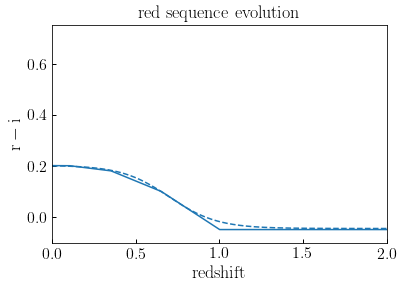

In [5]:
from cosmodc2.sdss_colors.sigmoid_r_minus_i import (default_ms_peak_ri, 
    red_sequence_peak_ri, main_sequence_peak_ri, r_minus_i, default_ms_peak_ri_zevol)


ngals = int(2e4)
redshift = np.linspace(0, 4, ngals)
ms_peak_ri = default_ms_peak_ri
ms_peak_ri_zevol_shift_table = default_ms_peak_ri_zevol

ri_mr25 = main_sequence_peak_ri(np.zeros(ngals) - 25, 
                                ms_peak_ri, redshift, ms_peak_ri_zevol_shift_table)
ri_mr25_model = sigmoid(redshift, x0=0.7, k=7, ymin=0.45, ymax=0.18)
ymin, ymax = red_sequence_ri_zevol_sigmoid_params(np.zeros(ngals) - 25)
ri_mr25_model2 = sigmoid(redshift, x0=0.7, k=7, ymin=ymin, ymax=ymax)

ri_mr23 = main_sequence_peak_ri(np.zeros(ngals) - 23, 
                                ms_peak_ri, redshift, ms_peak_ri_zevol_shift_table)
ri_mr23_model = sigmoid(redshift, x0=0.7, k=7, ymin=0.43, ymax=0.175)
ymin, ymax = red_sequence_ri_zevol_sigmoid_params(np.zeros(ngals) - 23)
ri_mr23_model2 = sigmoid(redshift, x0=0.7, k=7, ymin=ymin, ymax=ymax)


ri_mr21 = main_sequence_peak_ri(np.zeros(ngals) - 21, 
                                ms_peak_ri, redshift, ms_peak_ri_zevol_shift_table)
ri_mr21_model = sigmoid(redshift, x0=0.7, k=7, ymin=0.32, ymax=0.05)
ymin, ymax = red_sequence_ri_zevol_sigmoid_params(np.zeros(ngals) - 21)
ri_mr21_model2 = sigmoid(redshift, x0=0.7, k=7, ymin=ymin, ymax=ymax)

ri_mr19 = main_sequence_peak_ri(np.zeros(ngals) - 19, 
                                ms_peak_ri, redshift, ms_peak_ri_zevol_shift_table)
ri_mr19_model = sigmoid(redshift, x0=0.7, k=7, ymin=0.25, ymax=0.0)
ymin, ymax = red_sequence_ri_zevol_sigmoid_params(np.zeros(ngals) - 19)
ri_mr19_model2 = sigmoid(redshift, x0=0.7, k=7, ymin=ymin, ymax=ymax)

ri_mr17 = main_sequence_peak_ri(np.zeros(ngals) - 17, 
                                ms_peak_ri, redshift, ms_peak_ri_zevol_shift_table)
ri_mr17_model = sigmoid(redshift, x0=0.7, k=7, ymin=0.2, ymax=-0.05)
ymin, ymax = red_sequence_ri_zevol_sigmoid_params(np.zeros(ngals) - 17)
ri_mr17_model2 = sigmoid(redshift, x0=0.7, k=7, ymin=ymin, ymax=ymax)

ri_mr12 = main_sequence_peak_ri(np.zeros(ngals) - 12, 
                                ms_peak_ri, redshift, ms_peak_ri_zevol_shift_table)
ri_mr12_model = sigmoid(redshift, x0=0.7, k=7, ymin=0.18, ymax=-0.075)
ymin, ymax = red_sequence_ri_zevol_sigmoid_params(np.zeros(ngals) - 12)
ri_mr12_model2 = sigmoid(redshift, x0=0.7, k=7, ymin=ymin, ymax=ymax)

fig, ax = plt.subplots(1, 1)

# __=ax.plot(redshift, ri_mr25, 
#            color=mred, label=r'${\rm M_{r} = -25}$')
# __=ax.plot(redshift, ri_mr23, 
#            color=morange, label=r'${\rm M_{r} = -23}$')
# __=ax.plot(redshift, ri_mr21, 
#            color='gold', label=r'${\rm M_{r} = -21}$')
# __=ax.plot(redshift, ri_mr19, 
#            color=mgreen, label=r'${\rm M_{r} = -19}$')
__=ax.plot(redshift, ri_mr17, 
           color=mblue, label=r'${\rm M_{r} = -17}$')
# __=ax.plot(redshift, ri_mr12, 
#            color=mpurple, label=r'${\rm M_{r} = -12}$')

# __=ax.plot(redshift, ri_mr25_model2, '--', color=mred)
# __=ax.plot(redshift, ri_mr23_model2, '--', color=morange)
# __=ax.plot(redshift, ri_mr21_model2, '--', color='gold')
# __=ax.plot(redshift, ri_mr19_model2, '--', color=mgreen)
__=ax.plot(redshift, ri_mr17_model2, '--', color=mblue)
# __=ax.plot(redshift, ri_mr12_model2, '--', color=mpurple)

# __=ax.plot(redshift, ri_mr25_model, '--', color=mred)
# __=ax.plot(redshift, ri_mr23_model, '--', color=morange)
# __=ax.plot(redshift, ri_mr21_model, '--', 
#            color='gold', label=r'${\rm cosmoDC2}$')
# __=ax.plot(redshift, ri_mr19_model, '--', 
#            color=mgreen, label=r'${\rm new\ sigmoid\ model}$')
# __=ax.plot(redshift, ri_mr17_model, '--', color=mblue)
# __=ax.plot(redshift, ri_mr12_model, '--', color=mpurple)

# leg = ax.legend()
# leg.legendHandles[4].set_color('k')
# leg.legendHandles[5].set_color('k')
# leg.legendHandles[4].set_linestyle('-')

ylim = ax.set_ylim(-0.1, 0.75)
xlim = ax.set_xlim(0, 2.)
xlabel = ax.set_xlabel(r'${\rm redshift}$')
ylabel = ax.set_ylabel(r'${\rm r-i}$')
title = ax.set_title(r'${\rm red\ sequence\ evolution}$')
figname = 'new_color_evolution_model.png'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')